In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pylab

#!pip install --upgrade numpy
# Successfully installed numpy-1.21.5
import numpy as np
from skbio.diversity import alpha_diversity

# Set the figure size - handy for larger output
#plt.rcParams["figure.figsize"] = [10, 8]

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [3]:
#del dc
import data_clean as dc

In [3]:
# set directory
os.chdir('Greywater_Data/taxonomy')
# define file names 
# use taxonomy data from decontaminated sequence libraries (*_level_number.txt)
taxa_domain='taxomony_all_level_1.txt'
taxa_phylum='taxomony_all_level_2.txt'
taxa_class='taxomony_all_level_3.txt'
taxa_order='taxomony_all_level_4.txt'
taxa_family='taxomony_all_level_5.txt'
taxa_genus='taxomony_all_level_6.txt'
taxa_species='taxomony_all_level_7.txt'

reads = "reads_summary.txt"

In [4]:
taxa_metaphlan2 = "merged_metaphlan2_taxonomy_relab.txt"
taxa_df = pd.read_csv(taxa_metaphlan2, delimiter = "\t",index_col=0)

In [43]:
taxa_df = dc.clean_index_names(taxa_df, "|")
taxa_list = list(taxa_df.index)

# get only phylum level 
phy_list = []
for x in taxa_list: 
    if "p__" in x: 
        #x = x.rstrip("p__")
        phy_list.append(x)
phy_df = taxa_df.loc[phy_list].astype(float)


In [47]:
phy_df.shape

(16, 10)

In [48]:
phy_df = dc.sort_top_n(phy_df, 16)

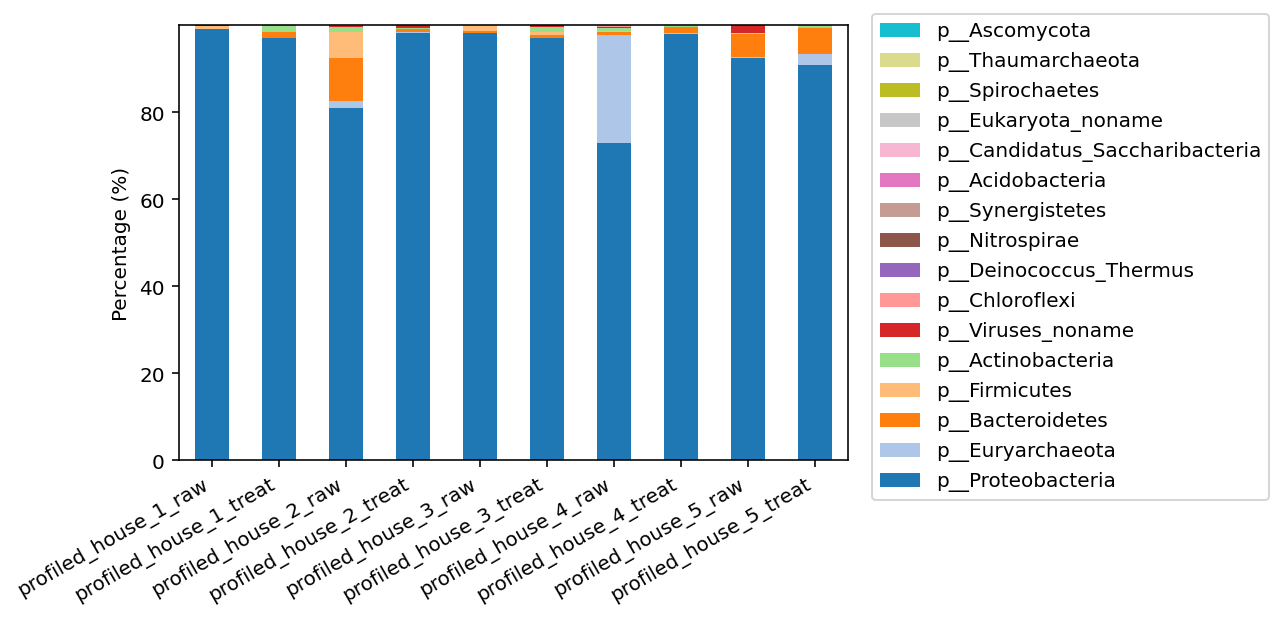

In [54]:
# define different colors
NUM_COLORS = 16
cm = pylab.get_cmap('tab20')
colors = []
for i in range(NUM_COLORS):
    colors.append(cm(1.*i/NUM_COLORS))
    
# make stacked bar plot
ax6 = phy_df.transpose().plot.bar(stacked = True, color = colors)
plt.xticks(rotation=30, horizontalalignment="right")
# reverse legend labels, set legend outside the plot.
handles, labels = ax6.get_legend_handles_labels()
ax6.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.02, 1.05))
plt.ylabel("Percentage (%)")
# save the plot
plt.savefig('figures/metaphlan2_phy_rel_abun.pdf',bbox_inches='tight')

In [9]:
taxa_df

profiled_house_1_raw profiled_house_1_treat  \
ID                                                                  
#SampleID              Metaphlan2_Analysis    Metaphlan2_Analysis   
k__Archaea                         0.03128                    0.0   
p__Euryarchaeota                   0.03128                    0.0   
c__Methanobacteria                     0.0                    0.0   
o__Methanobacteriales                  0.0                    0.0   
...                                    ...                    ...   
o__Viruses_noname                      0.0                    0.0   
f__Papillomaviridae                    0.0                    0.0   
g__Mupapillomavirus                    0.0                    0.0   
s__Mupapillomavirus_1                  0.0                    0.0   
t__PRJNA15491                          0.0                    0.0   

                      profiled_house_2_raw profiled_house_2_treat  \
ID                                                                  
#SampleID              Metaphlan2_Analysis    Metaphlan2_Analysis   
k__Archaea                         1.59189                0.03635   
p__Euryarchaeota                   1.59189                0.02781   
c__Methanobacteria                 0.00399                    0.0   
o__Methanobacteriales              0.00399                    0.0   
...                                    ...                    ...   
o__Viruses_noname                      0.0                    0.0   
f__Papillomaviridae                    0.0                    0.0   
g__Mupapillomavirus                    0.0                    0.0   
s__Mupapillomavirus_1                  0.0                    0.0   
t__PRJNA15491                          0.0                    0.0   

                      profiled_house_3_raw profiled_house_3_treat  \
ID                                                                  
#SampleID              Metaphlan2_Analysis    Metaphlan2_Analysis   
k__Archaea                         0.02259                    0.0   
p__Euryarchaeota                   0.02259                    0.0   
c__Methanobacteria                     0.0                    0.0   
o__Methanobacteriales                  0.0                    0.0   
...                                    ...                    ...   
o__Viruses_noname                      0.0                    0.0   
f__Papillomaviridae                    0.0                    0.0   
g__Mupapillomavirus                    0.0                    0.0   
s__Mupapillomavirus_1                  0.0                    0.0   
t__PRJNA15491                          0.0                    0.0   

                      profiled_house_4_raw profiled_house_4_treat  \
ID                                                                  
#SampleID              Metaphlan2_Analysis    Metaphlan2_Analysis   
k__Archaea                         24.7696                0.21723   
p__Euryarchaeota                   24.7696                0.21723   
c__Methanobacteria                     0.0                    0.0   
o__Methanobacteriales                  0.0                    0.0   
...                                    ...                    ...   
o__Viruses_noname                      0.0                    0.0   
f__Papillomaviridae                    0.0                    0.0   
g__Mupapillomavirus                    0.0                    0.0   
s__Mupapillomavirus_1                  0.0                    0.0   
t__PRJNA15491                          0.0                    0.0   

                      profiled_house_5_raw profiled_house_5_treat  
ID                                                                 
#SampleID              Metaphlan2_Analysis    Metaphlan2_Analysis  
k__Archaea                         0.13325                2.53025  
p__Euryarchaeota                   0.13325                2.53025  
c__Methanobacteria                     0.0                    0.0  
o__Methanobacteriales 

In [3]:
# read from txt files
taxa_df = pd.read_csv(taxa_genus, delimiter = "\t",index_col=0)
taxa_list = list(taxa_df.index)
# get the meaningful taxa name from the end
for name in taxa_list: 
    for i in range (1,7):
        if name.split(";")[-i] != "":
            taxa_df.rename(index={name: name.split(";")[-i]}, inplace=True)
taxa_df.dtypes

house_1_raw      int64
house_1_treat    int64
house_2_raw      int64
house_2_treat    int64
house_3_raw      int64
house_3_treat    int64
house_4_raw      int64
house_4_treat    int64
house_5_raw      int64
house_5_treat    int64
dtype: object

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'house_1_raw'),
  Text(1.5, 0, 'house_1_treat'),
  Text(2.5, 0, 'house_2_raw'),
  Text(3.5, 0, 'house_2_treat'),
  Text(4.5, 0, 'house_3_raw'),
  Text(5.5, 0, 'house_3_treat'),
  Text(6.5, 0, 'house_4_raw'),
  Text(7.5, 0, 'house_4_treat'),
  Text(8.5, 0, 'house_5_raw'),
  Text(9.5, 0, 'house_5_treat')])

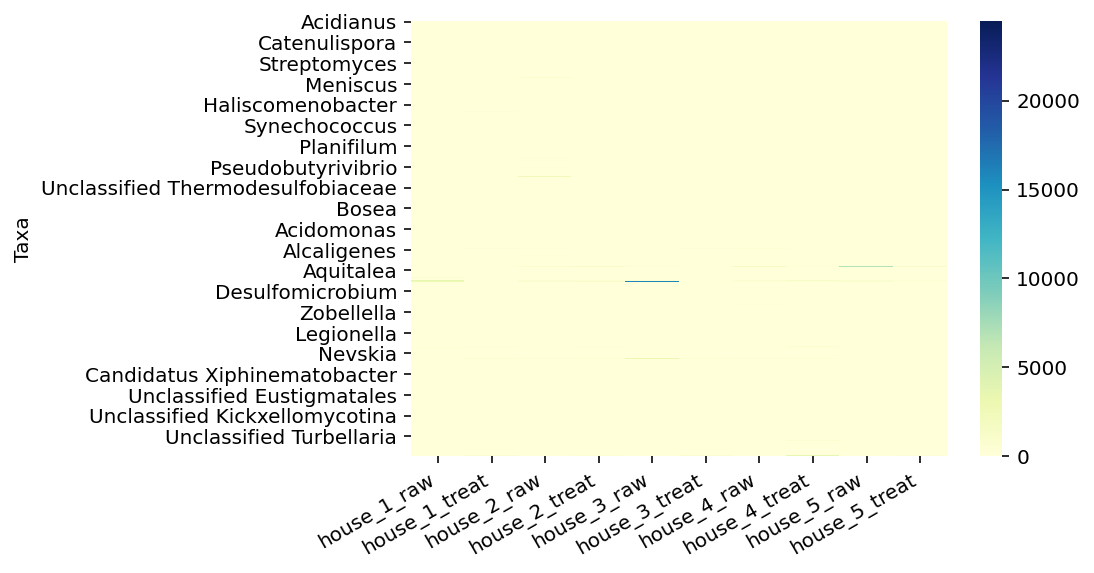

In [16]:
ax = sns.heatmap(taxa_df,cmap="YlGnBu")
plt.xticks(rotation=30, horizontalalignment="right")

In [18]:
"""ax2 = taxa_df.transpose().plot.bar(stacked = True)
plt.xticks(rotation=30, horizontalalignment="right")
ax2.legend(bbox_to_anchor=(1.05, 1.05))
"""

'ax2 = taxa_df.transpose().plot.bar(stacked = True)\nplt.xticks(rotation=30, horizontalalignment="right")\nax2.legend(bbox_to_anchor=(1.05, 1.05))\n'

### Metaxa2 plot

In [4]:
# read in metaxa2 reads numbers from file, 
# construct a dictionary of sample:reads.
reads = "reads_summary.txt"
reads_dict = {}
with open(reads, "r") as f: 
    for line in f.readlines():
        col = line.split(":")
        reads_dict[col[0]] = int(col[1])

In [5]:
reads_dict

{'house_1_raw': 51188,
 'house_1_treat': 29339,
 'house_2_raw': 52100,
 'house_2_treat': 46626,
 'house_3_raw': 82383,
 'house_3_treat': 23308,
 'house_4_raw': 33596,
 'house_4_treat': 51416,
 'house_5_raw': 36656,
 'house_5_treat': 17580}

In [68]:
# save metaxa2 reads for each sample in dataframe pkl
#reads_df = pd.DataFrame(reads_dict, index = ["reads"])
#reads_df.to_pickle("metaxa2_reads.pkl")

In [22]:
"""ax3 = taxa_relab_df.transpose().plot.bar(stacked = True)
plt.xticks(rotation=30, horizontalalignment="right")
ax3.legend(bbox_to_anchor=(1.05, 1.05))
plt.savefig('figures/phylum_relative_abundance.pdf',bbox_inches='tight')"""

'ax3 = taxa_relab_df.transpose().plot.bar(stacked = True)\nplt.xticks(rotation=30, horizontalalignment="right")\nax3.legend(bbox_to_anchor=(1.05, 1.05))\nplt.savefig(\'figures/phylum_relative_abundance.pdf\',bbox_inches=\'tight\')'

In [40]:
# put dataframe index (taxonomy names) in a list
organism_list = list(taxa_relab_df.index)
# create an empty dictionary
organism_sum = {}
for organism in organism_list:
    organism_sum[organism] = sum(filter(lambda i: isinstance(i, float), list(taxa_relab_df.loc[organism])))
# get top 15 organism by relative abundance
top_20_organism = sorted(organism_sum, key=organism_sum.get, reverse=True)[:20]
top_20_organism

['Unclassified Comamonadaceae',
 'Unclassified Bacteria',
 'Acinetobacter',
 'Pseudomonas',
 'Unclassified Burkholderiales',
 'Arcobacter',
 'Unclassified Betaproteobacteria',
 'Unclassified Neisseriaceae',
 'Acidovorax',
 'Aeromonas',
 'Unclassified Rhodocyclaceae',
 'Unclassified Gammaproteobacteria',
 'Flavobacterium',
 'Sulfurospirillum',
 'Zoogloea',
 'Unclassified ',
 'Unclassified Proteobacteria',
 'Unclassified Bacteroidetes',
 'Unclassified Maxillopoda',
 'Legionella']

### Plot from cleaned and filtred metaxa2 data

In [8]:
taxa = "metaxa2_phylum_relab_filtered01.csv"
taxa_df = pd.read_csv(taxa, delimiter = ",", index_col = 0)
taxa_df.head()

house_1_raw  house_1_treat  house_2_raw  house_2_treat  \
Taxa                                                                           
Crenarchaeota            0.000000       0.000000     0.000000       0.000043   
Euryarchaeota            0.000449       0.001602     0.002515       0.002209   
Thaumarchaeota           0.000000       0.005796     0.000000       0.000579   
Unclassified Archaea     0.000000       0.000477     0.000000       0.000450   
Acidobacteria            0.000742       0.004636     0.001593       0.002166   

                      house_3_raw  house_3_treat  house_4_raw  house_4_treat  \
Taxa                                                                           
Crenarchaeota            0.000000       0.000000     0.000060       0.000000   
Euryarchaeota            0.000109       0.002746     0.046199       0.000214   
Thaumarchaeota           0.000000       0.000086     0.000000       0.000000   
Unclassified Archaea     0.000000       0.000815     0.000000       0.000000   
Acidobacteria            0.000000       0.004205     0.005805       0.000214   

                      house_5_raw  house_5_treat  
Taxa                                              
Crenarchaeota            0.000000       0.000000  
Euryarchaeota            0.000055       0.000740  
Thaumarchaeota           0.000000       0.000114  
Unclassified Archaea     0.000000       0.000000  
Acidobacteria            0.001992       0.007169

In [7]:
diversity = pd.DataFrame()
diversity['Richness'] = taxa_df.astype(bool).sum(axis=0)
diversity['House'] = ['House 1', 'House 1', 'House 2', 'House 2', 'House 3', 'House 3', 
                     'House 4', 'House 4', 'House 5', 'House 5']
diversity['Treatment'] = ['Raw', 'Treated', 'Raw', 'Treated','Raw', 'Treated',
                         'Raw', 'Treated','Raw', 'Treated']

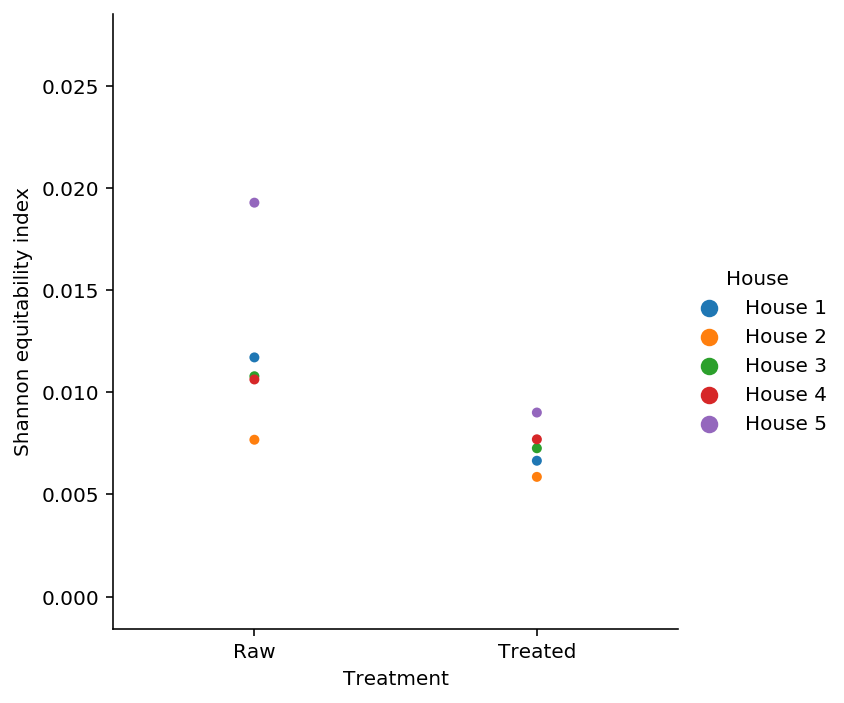

In [6]:
diversity = pd.read_csv('metaxa2_diveristy_genus.csv', index_col = 0)
sns.catplot(x="Treatment", y="Shannon equitability index", data=diversity, hue='House', jitter=False)
#plt.savefig('taxonomy/figures/metaxa2_genera_Shannon_equitability.pdf',bbox_inches='tight')

In [24]:
NUM_COLORS = 5
cm = pylab.get_cmap('Set2')
colors = []
for i in range(NUM_COLORS):
    colors.append(cm(1.*i/NUM_COLORS))

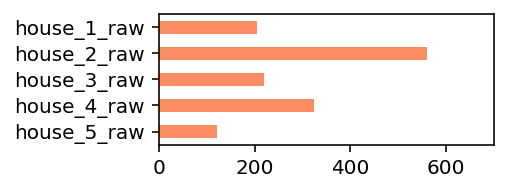

In [28]:
diversity = diversity.reindex(['house_5_treat', 'house_4_treat', 'house_3_treat', 'house_2_treat', 'house_1_treat',
                                 'house_5_raw', 'house_4_raw', 'house_3_raw', 'house_2_raw', 'house_1_raw'])
plt.rcParams['figure.figsize'] = [3, 1.2]
#fig, (ax1, ax2) = plt.subplots(2)
# make bar plot
ax1 = diversity['Richness'].tail(5).plot.barh(color = colors[1])
ax1.legend().set_visible(False)
plt.xlim([0,700])
plt.savefig('figures/Genera_richness_raw.pdf',bbox_inches='tight')

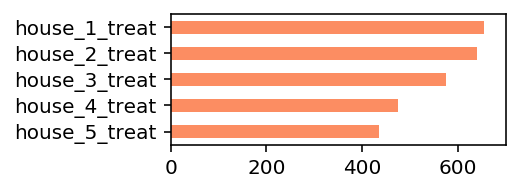

In [29]:
ax2 = diversity['Richness'].head(5).plot.barh(color = colors[1])
ax2.legend().set_visible(False)
plt.xlim([0,700])
#plt.ylabel("Antimicrobial resistance gene (RPKM)")
# save the plot
plt.savefig('figures/Genera_richness_treat.pdf',bbox_inches='tight')

In [33]:
# calculate Shannon diversity
H_prime = -taxa_df.apply(lambda a: a * np.log(a)).sum()

In [34]:
H_prime

house_1_raw      2.399387
house_1_treat    4.346797
house_2_raw      4.297635
house_2_treat    3.754005
house_3_raw      2.361370
house_3_treat    4.180143
house_4_raw      3.452946
house_4_treat    3.662867
house_5_raw      2.332621
house_5_treat    3.926319
dtype: float64

In [35]:
E_H = H_prime/taxa_df.astype(bool).sum(axis=0)
E_H

house_1_raw      0.011704
house_1_treat    0.006646
house_2_raw      0.007674
house_2_treat    0.005856
house_3_raw      0.010783
house_3_treat    0.007257
house_4_raw      0.010624
house_4_treat    0.007695
house_5_raw      0.019278
house_5_treat    0.009005
dtype: float64

In [37]:
diversity['Shannon diversity index'] = H_prime
diversity['Shannon equitability index'] = E_H
diversity.to_csv('taxonomy/metaxa2_diveristy_genus.csv')

In [7]:
taxa_df.transpose().to_csv('metaxa2_phylum_relab_filtered01_transpose.csv')

In [9]:
taxa_df['sum'] = taxa_df.sum(axis = 1)

In [12]:
top_15 = taxa_df.sort_values(by=['sum'], ascending = False).head(16).drop(columns=['sum'])
top_15 = top_15.drop(['Unclassified ;'])
#top_20 = top_20.drop(['Unclassified ;;;;;'])

In [13]:
print(list(top_15.index))

['Proteobacteria', 'Bacteroidetes', 'Unclassified Bacteria', 'Firmicutes', 'Chromalveolata', 'Metazoa', 'Actinobacteria', 'Chlamydiae', 'Planctomycetes', 'Euryarchaeota', 'Verrucomicrobia', 'Unclassified Eukaryota', 'Alveolata', 'Candidate division TM7', 'Rhizaria']


In [22]:
top_20 = pd.read_csv("taxonomy/metaxa2_top20_genera_relab_filtered01.csv", index_col=0)
top_20.head()

house_1_raw  house_1_treat  house_2_raw  house_2_treat  \
Taxa                                                                    
Acinetobacter     0.000137       0.073145     0.025268       0.258180   
Pseudomonas       0.206195       0.078767     0.016067       0.049113   
Arcobacter        0.320234       0.000310     0.010667       0.016609   
Acidovorax        0.000157       0.001069     0.012171       0.017386   
Aeromonas         0.000411       0.001483     0.009702       0.025745   

               house_3_raw  house_3_treat  house_4_raw  house_4_treat  \
Taxa                                                                    
Acinetobacter     0.034507       0.098710     0.000389       0.062394   
Pseudomonas       0.019593       0.024580     0.004613       0.002092   
Arcobacter        0.000097       0.003908     0.000988       0.007313   
Acidovorax        0.005068       0.002388     0.036721       0.000411   
Aeromonas         0.167856       0.020454     0.001078       0.000489   

               house_5_raw  house_5_treat  
Taxa                                       
Acinetobacter     0.016129       0.004746  
Pseudomonas       0.027967       0.012269  
Arcobacter        0.022199       0.000405  
Acidovorax        0.135050       0.044563  
Aeromonas         0.006889       0.003183

In [16]:
others = list(1-top_15.sum(axis = 0))
print(others)
top_15.loc["Others"] = others
top_15

[0.29558811799999996, 0.766010277, 0.834136992, 0.583918273, 0.6950883059999999, 0.771138185, 0.7273789239999999, 0.604305575, 0.723803252, 0.885294286]


house_1_raw  house_1_treat  house_2_raw  house_2_treat  \
Taxa                                                                       
Acinetobacter        0.000137       0.073145     0.025268       0.258180   
Pseudomonas          0.206195       0.078767     0.016067       0.049113   
Arcobacter           0.320234       0.000310     0.010667       0.016609   
Acidovorax           0.000157       0.001069     0.012171       0.017386   
Aeromonas            0.000411       0.001483     0.009702       0.025745   
Flavobacterium       0.000000       0.064731     0.002739       0.037947   
Sulfurospirillum     0.006054       0.000207     0.004571       0.004060   
Zoogloea             0.145051       0.000172     0.000907       0.000151   
Legionella           0.000000       0.014105     0.000058       0.001706   
Parabacteroides      0.012362       0.000000     0.072275       0.000734   
Tolumonas            0.013381       0.000000     0.004649       0.000000   
Chrysophyceae        0.000000       0.000000     0.000000       0.001404   
Aquaspirillum        0.000000       0.000000     0.000174       0.000000   
Dechloromonas        0.000431       0.000000     0.006616       0.001145   
Chrysophyceae        0.000000       0.000000     0.000000       0.001901   
Others               0.295588       0.766010     0.834137       0.583918   

                  house_3_raw  house_3_treat  house_4_raw  house_4_treat  \
Taxa                                                                       
Acinetobacter        0.034507       0.098710     0.000389       0.062394   
Pseudomonas          0.019593       0.024580     0.004613       0.002092   
Arcobacter           0.000097       0.003908     0.000988       0.007313   
Acidovorax           0.005068       0.002388     0.036721       0.000411   
Aeromonas            0.167856       0.020454     0.001078       0.000489   
Flavobacterium       0.000000       0.074478     0.003444       0.001682   
Sulfurospirillum     0.000255       0.000347     0.162938       0.000117   
Zoogloea             0.000596       0.000000     0.000958       0.000450   
Legionella           0.000036       0.002345     0.000000       0.105430   
Parabacteroides      0.000328       0.000651     0.011591       0.000469   
Tolumonas            0.001398       0.000521     0.048642       0.017930   
Chrysophyceae        0.000000       0.000087     0.000060       0.093972   
Aquaspirillum        0.073973       0.000130     0.000000       0.000254   
Dechloromonas        0.001203       0.000000     0.001078       0.030073   
Chrysophyceae        0.000000       0.000261     0.000120       0.072620   
Others               0.695088       0.771138     0.727379       0.604306   

                  house_5_raw  house_5_treat  
Taxa                                          
Acinetobacter        0.016129       0.004746  
Pseudomonas          0.027967       0.012269  
Arcobacter           0.022199       0.000405  
Acidovorax           0.135050       0.044563  
Aeromonas            0.006889       0.003183  
Flavobacterium       0.000219       0.006887  
Sulfurospirillum     0.010635       0.000463  
Zoogloea             0.033845       0.006192  
Legionella           0.000000       0.005382  
Parabacteroides      0.001558       0.000116  
Tolumonas            0.010060       0.000810  
Chrysophyceae        0.000000       0.000231  
Aquaspirillum        0.003171       0.000463  
Dechloromonas        0.008420       0.028705  
Chrysophyceae        0.000055       0.000289  
Others               0.723803       0.885294

In [23]:
print(list(top_20.index))

['Acinetobacter', 'Pseudomonas', 'Arcobacter', 'Acidovorax', 'Aeromonas', 'Flavobacterium', 'Sulfurospirillum', 'Zoogloea', 'Legionella', 'Parabacteroides', 'Tolumonas', 'Chrysophyceae', 'Aquaspirillum', 'Dechloromonas', 'Chrysophyceae', '12up', 'Geobacter', 'Chromobacterium', 'Anaerosinus', 'Cloacibacterium', 'Others']


In [41]:
# create an empty dataframe
top_20_df = pd.DataFrame()
# append top 15 phyla data to the new dataframe and save to top_15_df 
top_20_df = top_20_df.append(taxa_relab_df.loc[top_20_organism])

In [21]:
# define n different colors
NUM_COLORS = 20
cm = pylab.get_cmap('tab20')
colors = []
for i in range(NUM_COLORS):
    colors.append(cm(1.*i/NUM_COLORS))
colors.append("lightgrey")

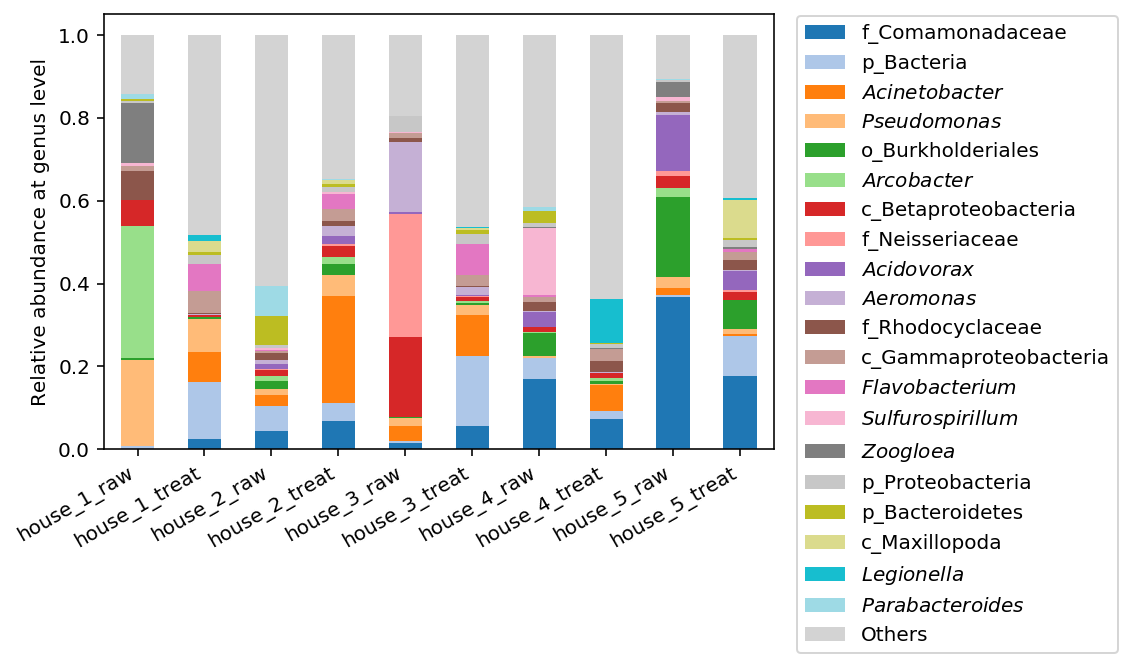

In [42]:
# make stacked bar plot
ax = top_20.transpose().plot.bar(stacked = True, color = colors)
plt.xticks(rotation=30, horizontalalignment="right")
# reverse legend labels, set legend outside the plot.
#handles, labels = ax4.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.02, 0.75))
ax.legend(['f_Comamonadaceae', 'p_Bacteria', 
           '$\\it{Acinetobacter}$', '$\\it{Pseudomonas}$', 'o_Burkholderiales', 
           '$\\it{Arcobacter}$', 'c_Betaproteobacteria', 
           'f_Neisseriaceae', '$\\it{Acidovorax}$', 
           '$\\it{Aeromonas}$', 'f_Rhodocyclaceae', 
           'c_Gammaproteobacteria', 
           '$\\it{Flavobacterium}$', '$\\it{Sulfurospirillum}$', 
           '$\\it{Zoogloea}$','p_Proteobacteria', 'p_Bacteroidetes', 
           'c_Maxillopoda', '$\\it{Legionella}$', '$\\it{Parabacteroides}$',
           "Others"], bbox_to_anchor=(1.02, 1.02))

plt.ylabel("Relative abundance at genus level")
# save the plot
plt.savefig('figures/metaxa2_top_20_genus_rel_abun.pdf',bbox_inches='tight')

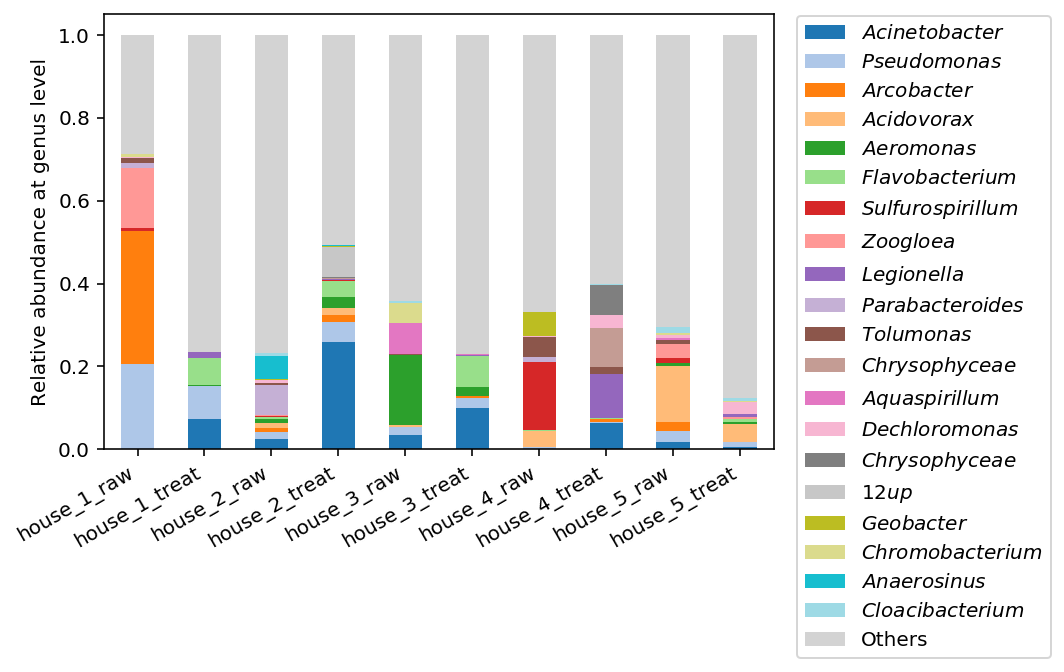

In [24]:
# make stacked bar plot
ax = top_20.transpose().plot.bar(stacked = True, color = colors)
plt.xticks(rotation=30, horizontalalignment="right")
# reverse legend labels, set legend outside the plot.
#handles, labels = ax4.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.02, 0.75))
ax.legend(['$\\it{Acinetobacter}$', '$\\it{Pseudomonas}$', '$\\it{Arcobacter}$', '$\\it{Acidovorax}$', '$\\it{Aeromonas}$', 
           '$\\it{Flavobacterium}$', '$\\it{Sulfurospirillum}$', '$\\it{Zoogloea}$', '$\\it{Legionella}$', '$\\it{Parabacteroides}$', 
           '$\\it{Tolumonas}$', '$\\it{Chrysophyceae}$', '$\\it{Aquaspirillum}$', '$\\it{Dechloromonas}$', '$\\it{Chrysophyceae}$', 
           '$\\it{12up}$', '$\\it{Geobacter}$', '$\\it{Chromobacterium}$', '$\\it{Anaerosinus}$', '$\\it{Cloacibacterium}$',
           'Others'], bbox_to_anchor=(1.02, 1.02))
plt.ylabel("Relative abundance at genus level")
# save the plot
plt.savefig('taxonomy/figures/metaxa2_top20_genus_relative_abundance.pdf',bbox_inches='tight')

In [6]:
metaxa2_gen_relab = pd.read_csv("taxonomy/metaxa2_genera_relab_filtered01.csv", index_col=0)

In [7]:
metaxa2_gen_relab.head()

house_1_raw  house_1_treat  house_2_raw  \
Taxa                                                                     
Pyrobaculum                            0.0       0.000000     0.000000   
Haloarcula                             0.0       0.000000     0.000000   
Unclassified Halobacteriaceae          0.0       0.000069     0.000000   
Unclassified Halobacteriales           0.0       0.000069     0.000000   
Methanobacterium                       0.0       0.000000     0.000039   

                               house_2_treat  house_3_raw  house_3_treat  \
Taxa                                                                       
Pyrobaculum                         0.000000          0.0       0.000000   
Haloarcula                          0.000043          0.0       0.000000   
Unclassified Halobacteriaceae       0.000259          0.0       0.000174   
Unclassified Halobacteriales        0.000065          0.0       0.000000   
Methanobacterium                    0.000043          0.0       0.000000   

                               house_4_raw  house_4_treat  house_5_raw  \
Taxa                                                                     
Pyrobaculum                        0.00006            0.0          0.0   
Haloarcula                         0.00000            0.0          0.0   
Unclassified Halobacteriaceae      0.00000            0.0          0.0   
Unclassified Halobacteriales       0.00000            0.0          0.0   
Methanobacterium                   0.00000            0.0          0.0   

                               house_5_treat  
Taxa                                          
Pyrobaculum                              0.0  
Haloarcula                               0.0  
Unclassified Halobacteriaceae            0.0  
Unclassified Halobacteriales             0.0  
Methanobacterium                         0.0

In [8]:
metaxa2_gen_relab['sum'] = metaxa2_gen_relab.sum(axis = 1)
metaxa2_gen_relab_sorted = metaxa2_gen_relab.sort_values(by=['sum'], ascending = False).drop(columns=['sum'])
metaxa2_gen_relab_sorted.head(10)

house_1_raw  house_1_treat  house_2_raw  \
Taxa                                                                       
Unclassified Comamonadaceae         0.001606       0.023899     0.042994   
Unclassified Bacteria               0.007014       0.138635     0.062013   
Acinetobacter                       0.000137       0.073145     0.025268   
Pseudomonas                         0.206195       0.078767     0.016067   
Unclassified Burkholderiales        0.004819       0.003690     0.019192   
Arcobacter                          0.320234       0.000310     0.010667   
Unclassified Betaproteobacteria     0.061692       0.004414     0.013849   
Unclassified Neisseriaceae          0.000568       0.001138     0.004533   
Acidovorax                          0.000157       0.001069     0.012171   
Aeromonas                           0.000411       0.001483     0.009702   

                                 house_2_treat  house_3_raw  house_3_treat  \
Taxa                                                                         
Unclassified Comamonadaceae           0.069048     0.013856       0.055022   
Unclassified Bacteria                 0.043066     0.006746       0.170235   
Acinetobacter                         0.258180     0.034507       0.098710   
Pseudomonas                           0.049113     0.019593       0.024580   
Unclassified Burkholderiales          0.028358     0.003962       0.005255   
Arcobacter                            0.016609     0.000097       0.003908   
Unclassified Betaproteobacteria       0.025961     0.192894       0.008555   
Unclassified Neisseriaceae            0.005853     0.297133       0.003604   
Acidovorax                            0.017386     0.005068       0.002389   
Aeromonas                             0.025745     0.167856       0.020454   

                                 house_4_raw  house_4_treat  house_5_raw  \
Taxa                                                                       
Unclassified Comamonadaceae         0.168958       0.071994     0.367533   
Unclassified Bacteria               0.051577       0.019709     0.005222   
Acinetobacter                       0.000389       0.062394     0.016129   
Pseudomonas                         0.004613       0.002092     0.027967   
Unclassified Burkholderiales        0.055950       0.009483     0.192159   
Arcobacter                          0.000988       0.007313     0.022199   
Unclassified Betaproteobacteria     0.012879       0.009952     0.028760   
Unclassified Neisseriaceae          0.000120       0.001349     0.011783   
Acidovorax                          0.036721       0.000411     0.135050   
Aeromonas                           0.001078       0.000489     0.006889   

                                 house_5_treat  
Taxa                                            
Unclassified Comamonadaceae           0.176746  
Unclassified Bacteria                 0.096360  
Acinetobacter                         0.004746  
Pseudomonas                           0.012269  
Unclassified Burkholderiales          0.069275  
Arcobacter                            0.000405  
Unclassified Betaproteobacteria       0.020835  
Unclassified Neisseriaceae            0.004746  
Acidovorax                            0.044563  
Aeromonas                             0.003183

In [10]:
metaxa2_gen_relab_sorted.to_csv("taxonomy/metaxa2_genera_relab_filtered01_sorted.csv")

### plot phylum

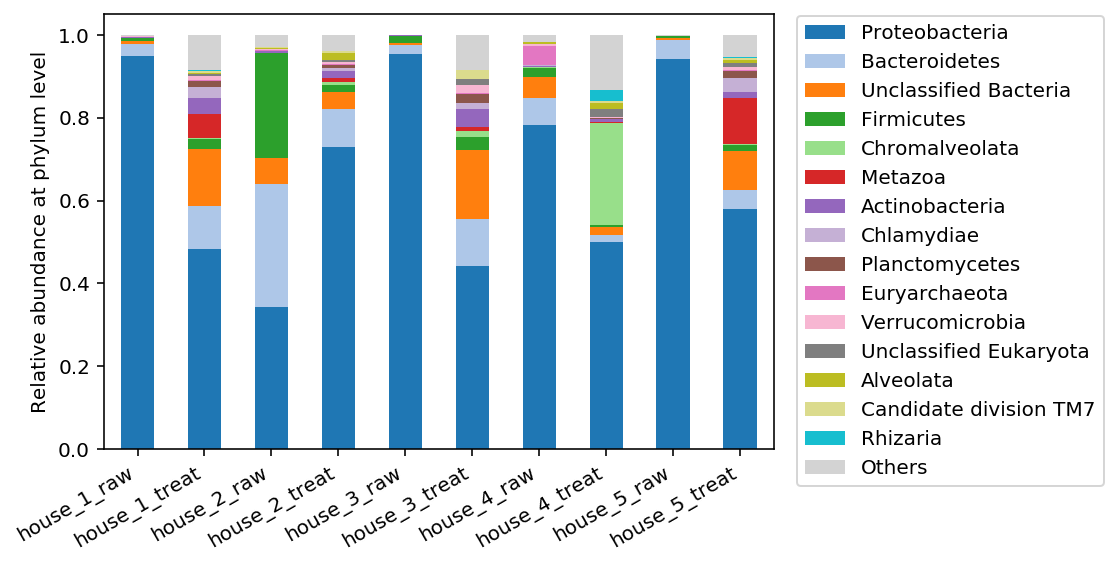

In [19]:
# make stacked bar plot
ax = top_15.transpose().plot.bar(stacked = True, color = colors)
plt.xticks(rotation=30, horizontalalignment="right")
# reverse legend labels, set legend outside the plot.
#handles, labels = ax4.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.02, 0.75))
ax.legend(['Proteobacteria', 'Bacteroidetes', 'Unclassified Bacteria', 'Firmicutes', 
           'Chromalveolata', 'Metazoa', 'Actinobacteria', 'Chlamydiae', 'Planctomycetes', 
           'Euryarchaeota', 'Verrucomicrobia', 'Unclassified Eukaryota', 
           'Alveolata', 'Candidate division TM7', 'Rhizaria', 'Others'], bbox_to_anchor=(1.02, 1.02))

plt.ylabel("Relative abundance at phylum level")
# save the plot
plt.savefig('figures/metaxa2_top_15_phylum_rel_abun.pdf',bbox_inches='tight')

### use raw counts for diveristy 

In [13]:
# metaxa2
taxa_count = pd.read_csv("taxonomy/metaxa2_genus_counts_filtered01.csv", index_col=0)
taxa_count.head()

house_1_raw  house_1_treat  house_2_raw  \
Taxa                                                                     
Pyrobaculum                            0.0            0.0          0.0   
Haloarcula                             0.0            0.0          0.0   
Unclassified Halobacteriaceae          0.0            2.0          0.0   
Unclassified Halobacteriales           0.0            2.0          0.0   
Methanobacterium                       0.0            0.0          2.0   

                               house_2_treat  house_3_raw  house_3_treat  \
Taxa                                                                       
Pyrobaculum                              0.0          0.0            0.0   
Haloarcula                               2.0          0.0            0.0   
Unclassified Halobacteriaceae           12.0          0.0            4.0   
Unclassified Halobacteriales             3.0          0.0            0.0   
Methanobacterium                         2.0          0.0            0.0   

                               house_4_raw  house_4_treat  house_5_raw  \
Taxa                                                                     
Pyrobaculum                            2.0            0.0          0.0   
Haloarcula                             0.0            0.0          0.0   
Unclassified Halobacteriaceae          0.0            0.0          0.0   
Unclassified Halobacteriales           0.0            0.0          0.0   
Methanobacterium                       0.0            0.0          0.0   

                               house_5_treat  
Taxa                                          
Pyrobaculum                              0.0  
Haloarcula                               0.0  
Unclassified Halobacteriaceae            0.0  
Unclassified Halobacteriales             0.0  
Methanobacterium                         0.0